# 텍스트마이닝 입문_2

                                                         note by D.H.Yeom

**[학습목표(미션)]**
1. 데이터 **전처리**에서 중요한 **불용어**를 처리할 수 있다
2. 텍스트의 **빈도수 & 단어수**를 추출하여 그래프로 나타낼 수 있다.

**[학습내용]**
* 텍스트 분석에서 중요한 전처리 기법인 필요하지 않은 정보(단어, 조사 등), 즉 **불용어** 제거 방법을 학습한다.
* 텍스트의 **빈도수를 추출**하여 그래프로 시각화하는 방법을 학습한다.
* 빈도수와 단어수를 추출하여 시각화하는 방법을 학습한다.

# 1.자연어 처리를 위한 환경 구축 : Library

* 1) konlpy 설치
* 2) 형태소 분석기 생성 : Okt
* 3) 한글글꼴 설치
* 4) wordCloud 설치 : 워드클라우드 만들기
* 5) Matplotlib 설치 : 워드클라우드 시각화(그림, 소리, 애니메이션 등을 시각화 해줌)
* 6) 빈도분석 및 시각화를 위한 라이브러리

In [1]:
!pip install konlpy   # konlpy 설치
#!pip install wordcloud

ERROR: Invalid requirement: '#'


In [2]:
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: c:\users\yeomd\anaconda3\lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [3]:
# Okt 형태소 분석기 생성
from konlpy.tag import Okt
okt = Okt()

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# matplotlib 설치
import matplotlib as mpl                           # 기본적인 데이터 시각화 라이브러리(matplotlib) 설치
import matplotlib.pyplot as plt

import seaborn as sns           # Seaborn 패키지는 데이터프레임으로 다양한 통계 지표를 낼 수 있는 시각화 차트 제공
#mpl.rc('axes', unicode_minus=False)                # 그래프에서 마이너스 기호가 깨질 경우 사용. rc:rcParams

In [6]:
# Counter 빈도수 추출
from collections import Counter
import collections

In [7]:
# 빈도분석 및 시각화를 위한 라이브러리. import module(각종 변수, 함수 등의 파일)을 가져옴. package(여러 모듈의 묶음)
import pandas as pd             # 엑셀 기능(활용도 매우 높음) 가로세로 데이터를 DataFrame, 세로 데이터를 series라고 함
import numpy as np              # 연산기능(활용도 매우 높음)

## **한글 폰트**

In [8]:
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [ ]:
# 한글 글꼴 설치: 나눔글꼴
#! apt-get install fonts-nanum
#font_path = '/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [ ]:
#!apt -qq -y install fonts-nanum > /dev/null        # 폰트 설치

# 기본 폰트가 되도록 설정
#import matplotlib.font_manager as fm
#font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#font = fm.FontProperties(fname=font_path, size=9)
#plt.rc('font', family='NanumBarunGothic')
#mpl.font_manager._rebuild()                            # fm._rebuild()
#plt.rcParams['axes.unicode_minus'] = False

# 그래프에 retina display 적용 폰트를 선명하게 보여줌
#%config InlineBackend.figure_format = 'retina'         # %config Inline 그래프를 노트 안에 그림.#

# 2.데이터 가져오기

* **데이터 수집 방법**은 크게 1) 입력, 2) 업로드, 3) 크롤링의 세가지가 있다.
* 이번 실습에서는 먼저 **1)입력, 즉 직접 입력하는**방법을  활용한다.


[텍스트 데이터: 한신대 총장 인사말](https://www.hs.ac.kr/kor/8382/subview.do)

In [9]:
text = '한신대학교는 기독교 정신에 입각하여 진리탐구, 자유구현, 사랑실천의 교육을 이념으로 역사의 험로를 따라 82년을 걸어왔습니다. 지나온 역사 속에서 한신은 학문과 양심의 자유, 인권과 민주화, 민족 자주와 평화통일, 세계에 대한 책임성을 기치로 한국사회의 변혁을 주도했고, 보수 근본주의 기독교를 일깨워 한국교회의 개혁을 이끌어 왔습니다. 한신대학교는 학문 연구의 상아탑이며 동시에 학생들의 미래 설계와 준비에 도움을 주는 배움터로 학생들의 꿈이 성장하고 실현될 수 있도록 노력하고 있습니다. 한신의 교육은 신학적 영성의 깊이와 인문학적 상상력의 높이, 사회과학적 분석의 넓이와 과학적 창의성의 길이를 근간으로 융복합적인 지식의 탐구와 적용을 구현하는 교육을 지향하고 있습니다. 이를 통해 시대의 전환 속에서 가치있는 삶을 실현하는 미래지향적 인재를 길러낼 것입니다. 한신대학교의 교육은 지식정보 만을 전달하기보다 인간에 대한 존중과 예의를 바탕으로 한 ‘인간애’ 구현의 형성을 목표로 합니다. 이기심에 기초한 성공이 아니라, 타인을 존중하고 배려할 줄 아는 ‘더불어 사는 삶’을 지향하는 인간상을 지향합니다. 한신대학교는 여러분이 소중한 꿈을 실현하도록 돕고 응원합니다.'

1) 형태소 분석

In [10]:
# pos로 토큰화
sentence = okt.pos(text)
print(sentence)
#sentence

[('한', 'Determiner'), ('신', 'Modifier'), ('대학교', 'Noun'), ('는', 'Josa'), ('\xa0', 'Foreign'), ('기독교', 'Noun'), ('\xa0', 'Foreign'), ('정신', 'Noun'), ('에', 'Josa'), ('\xa0', 'Foreign'), ('입', 'Noun'), ('각하', 'Noun'), ('여', 'Josa'), ('\xa0', 'Foreign'), ('진리', 'Noun'), ('탐구', 'Noun'), (',', 'Punctuation'), ('\xa0', 'Foreign'), ('자유', 'Noun'), ('구현', 'Noun'), (',', 'Punctuation'), ('\xa0', 'Foreign'), ('사랑', 'Noun'), ('실천', 'Noun'), ('의', 'Josa'), ('\xa0', 'Foreign'), ('교육', 'Noun'), ('을', 'Josa'), ('\xa0', 'Foreign'), ('이념', 'Noun'), ('으로', 'Josa'), ('\xa0', 'Foreign'), ('역사', 'Noun'), ('의', 'Josa'), ('\xa0', 'Foreign'), ('험로', 'Noun'), ('를', 'Josa'), ('\xa0', 'Foreign'), ('따라', 'Verb'), ('\xa0', 'Foreign'), ('82년', 'Number'), ('을\xa0', 'Foreign'), ('걸어왔습니다', 'Verb'), ('.', 'Punctuation'), ('\xa0', 'Foreign'), ('지나', 'Noun'), ('온', 'Noun'), ('\xa0', 'Foreign'), ('역사', 'Noun'), ('\xa0', 'Foreign'), ('속', 'Noun'), ('에서', 'Josa'), ('\xa0', 'Foreign'), ('한신', 'Noun'), ('은', 'Josa'), ('\xa0', 

In [11]:
# 명사(nouns)로 토큰화
nouns = okt.nouns(text)
print(nouns)

['대학교', '기독교', '정신', '입', '각하', '진리', '탐구', '자유', '구현', '사랑', '실천', '교육', '이념', '역사', '험로', '지나', '온', '역사', '속', '한신', '학문', '양심', '자유', '인권', '민주화', '민족', '자주', '평화통일', '세계', '대한', '책임', '한국사', '회의', '변혁', '보수', '근본', '주의', '기독교', '일', '한국', '교회', '개혁', '대학교', '학문', '연구', '상아탑', '동시', '학생', '미래', '설계', '준비', '도움', '배움터', '학생', '꿈', '실현', '수', '노력', '한신', '교육', '학적', '영성', '깊이', '인문학', '상상력', '높이', '사회과학', '분석', '넓이', '과학', '창의성', '길이', '근간', '융', '복합', '지식', '탐구', '적용', '구현', '교육', '지향', '통해', '시대', '전환', '속', '가치', '삶', '실현', '미래', '지향', '인재', '낼', '것', '대학교', '교육', '지식', '정보', '전달', '인간', '대한', '존중', '예의', '바탕', '인간', '애', '구현', '형성', '목표', '이기심', '기초', '성공', '타인', '존중', '배려', '줄', '삶', '지향', '인간', '지향', '대학교', '여러분', '꿈', '실현', '응원']


2) 빈도수 추출

* collection() 메소드를 활용하여 동일한 값의 자료(같은 단어)의 빈도수를 구한다.
* 또한 most_common(n)을 사용하면 빈도수가 많은 순서대로 n개의 단어를 추출할 수 있다.

In [14]:
from collections import Counter           # 빈도수를 카운트하는 라이브러리
import collections

adj_list = []                             # 추출한 단어를 저장
for word, tag in sentence:                # 반복문을 통해 sentence_tag 안의 단어, tag를 반복 수행
    if tag in ['Noun', 'Adjective']:      # 조건문으로 tag의 명사와 형용사만 추출
        adj_list.append(word)             # adj_list에 추출된 word를 추가

counts = collections.Counter(adj_list)    # adj_list를 counts에 저장
tag = counts.most_common()                # 가장 많은 빈도수를 tag에 저장
print(tag)                                # 저장된 tag 출력

[('대학교', 4), ('교육', 4), ('지향', 4), ('구현', 3), ('실현', 3), ('인간', 3), ('기독교', 2), ('탐구', 2), ('자유', 2), ('역사', 2), ('속', 2), ('한신', 2), ('학문', 2), ('대한', 2), ('학생', 2), ('미래', 2), ('꿈', 2), ('있습니다', 2), ('지식', 2), ('삶', 2), ('존중', 2), ('정신', 1), ('입', 1), ('각하', 1), ('진리', 1), ('사랑', 1), ('실천', 1), ('이념', 1), ('험로', 1), ('지나', 1), ('온', 1), ('양심', 1), ('인권', 1), ('민주화', 1), ('민족', 1), ('자주', 1), ('평화통일', 1), ('세계', 1), ('책임', 1), ('한국사', 1), ('회의', 1), ('변혁', 1), ('주도했고', 1), ('보수', 1), ('근본', 1), ('주의', 1), ('일', 1), ('한국', 1), ('교회', 1), ('개혁', 1), ('연구', 1), ('상아탑', 1), ('동시', 1), ('설계', 1), ('준비', 1), ('도움', 1), ('배움터', 1), ('성장하고', 1), ('수', 1), ('있도록', 1), ('노력', 1), ('학적', 1), ('영성', 1), ('깊이', 1), ('인문학', 1), ('상상력', 1), ('높이', 1), ('사회과학', 1), ('분석', 1), ('넓이', 1), ('과학', 1), ('창의성', 1), ('길이', 1), ('근간', 1), ('융', 1), ('복합', 1), ('적용', 1), ('통해', 1), ('시대', 1), ('전환', 1), ('가치', 1), ('있는', 1), ('인재', 1), ('낼', 1), ('것', 1), ('입니다', 1), ('정보', 1), ('전달', 1), ('예의', 1), ('바탕', 1)

**[해설]**
* pos(text)로 text를 품사와 단어가 튜플(쌍)로 반환.
* for 반복문에서 '품사'와 '단어'를 'tag'와 'word'에 저장하여 명사 또는 형용사인 단어만 추출하여 adj_list에 추가한다.
* sentence_tag를 모두 읽어온 후에 adj_list에 있는 단어의 빈도수는 Counter()를 사용하여 구할 수 있다.

# 3.워드클라우드 생성하기

In [12]:
!pip install wordcloud

In [16]:
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path,                 # 폰트 경로지정
               background_color='white',              # 배경색 지정
               max_font_size=100,                     # 최대 폰트 사이즈
               width=300, height=300)

cloud = wc.generate_from_frequencies(dict(tag))       # 미리 정의된 단어의 빈도수를 이용하여 워드 클라우드를 그림


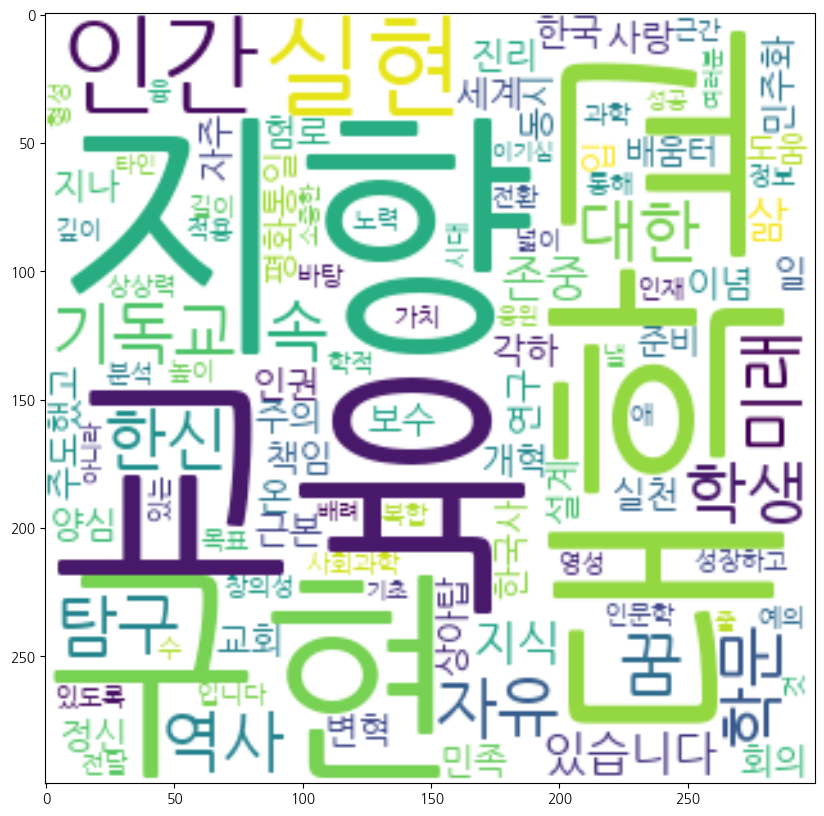

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation='bilinear')

* 상위 30개 단어만 추출하여 워드클라우드를 생성한다

In [18]:
counts = collections.Counter(adj_list)
tag = counts.most_common(30)                # 30개만 추출
print(tag)

[('대학교', 4), ('교육', 4), ('지향', 4), ('구현', 3), ('실현', 3), ('인간', 3), ('기독교', 2), ('탐구', 2), ('자유', 2), ('역사', 2), ('속', 2), ('한신', 2), ('학문', 2), ('대한', 2), ('학생', 2), ('미래', 2), ('꿈', 2), ('있습니다', 2), ('지식', 2), ('삶', 2), ('존중', 2), ('정신', 1), ('입', 1), ('각하', 1), ('진리', 1), ('사랑', 1), ('실천', 1), ('이념', 1), ('험로', 1), ('지나', 1)]


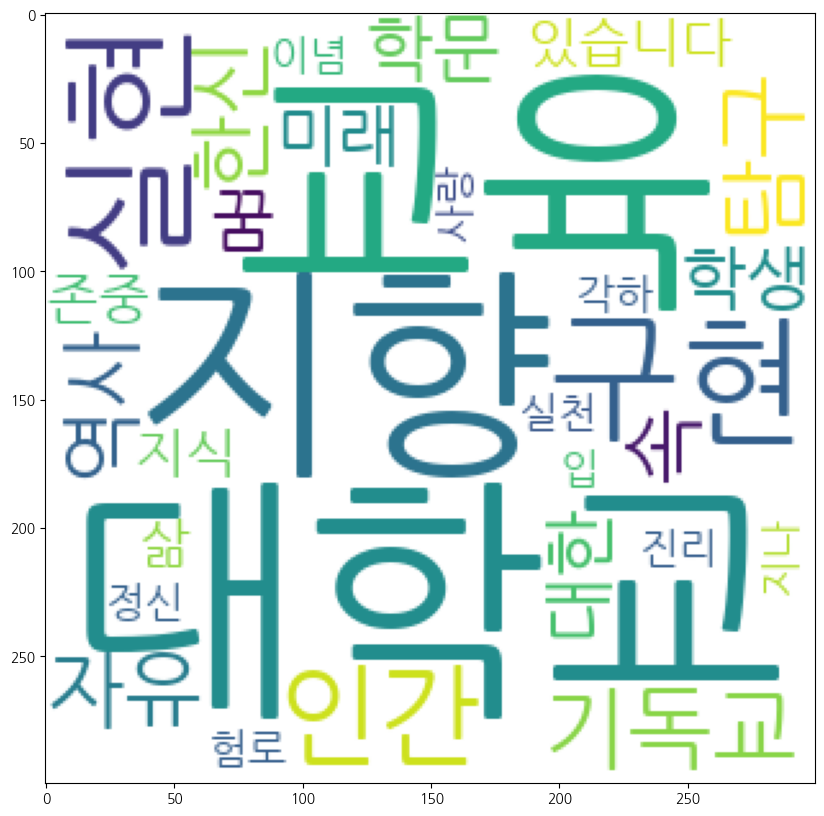

In [19]:
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path,
               background_color='white',
               max_font_size=100,
               width=300, height=300)

cloud = wc.generate_from_frequencies(dict(tag))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(cloud)

# **-----------------------------------------------------**

# 4.데이터 전처리

## 4.1 불용어 처리_1

In [20]:
text1 = '한신대학교는 기독교 정신에 입각하여 진리탐구, 자유구현, 사랑실천의 교육을 이념으로 역사의 험로를 따라 82년을 걸어왔습니다.'

In [21]:
sentence1 = okt.pos(text1)
print(sentence1)

[('한', 'Determiner'), ('신', 'Modifier'), ('대학교', 'Noun'), ('는', 'Josa'), ('\xa0', 'Foreign'), ('기독교', 'Noun'), ('\xa0', 'Foreign'), ('정신', 'Noun'), ('에', 'Josa'), ('\xa0', 'Foreign'), ('입', 'Noun'), ('각하', 'Noun'), ('여', 'Josa'), ('\xa0', 'Foreign'), ('진리', 'Noun'), ('탐구', 'Noun'), (',', 'Punctuation'), ('\xa0', 'Foreign'), ('자유', 'Noun'), ('구현', 'Noun'), (',', 'Punctuation'), ('\xa0', 'Foreign'), ('사랑', 'Noun'), ('실천', 'Noun'), ('의', 'Josa'), ('\xa0', 'Foreign'), ('교육', 'Noun'), ('을', 'Josa'), ('\xa0', 'Foreign'), ('이념', 'Noun'), ('으로', 'Josa'), ('\xa0', 'Foreign'), ('역사', 'Noun'), ('의', 'Josa'), ('\xa0', 'Foreign'), ('험로', 'Noun'), ('를', 'Josa'), ('\xa0', 'Foreign'), ('따라', 'Verb'), ('\xa0', 'Foreign'), ('82년', 'Number'), ('을\xa0', 'Foreign'), ('걸어왔습니다', 'Verb'), ('.', 'Punctuation')]


In [22]:
from collections import Counter           # 빈도수를 카운트하는 라이브러리
import collections

adj_list = []                             # 추출한 단어를 저장
for word, tag in sentence1:                # 반복문을 통해 sentence_tag 안의 단어, tag를 반복 수행
    if tag in ['Noun', 'Adjective']:      # 조건문으로 tag의 명사와 형용사만 추출
        adj_list.append(word)             # adj_list에 추출된 word를 추가

counts = collections.Counter(adj_list)    # adj_list를 counts에 저장
tag1 = counts.most_common()                # 가장 많은 빈도수를 tag에 저장
print(tag1)                                # 저장된 tag 출력

[('대학교', 1), ('기독교', 1), ('정신', 1), ('입', 1), ('각하', 1), ('진리', 1), ('탐구', 1), ('자유', 1), ('구현', 1), ('사랑', 1), ('실천', 1), ('교육', 1), ('이념', 1), ('역사', 1), ('험로', 1)]


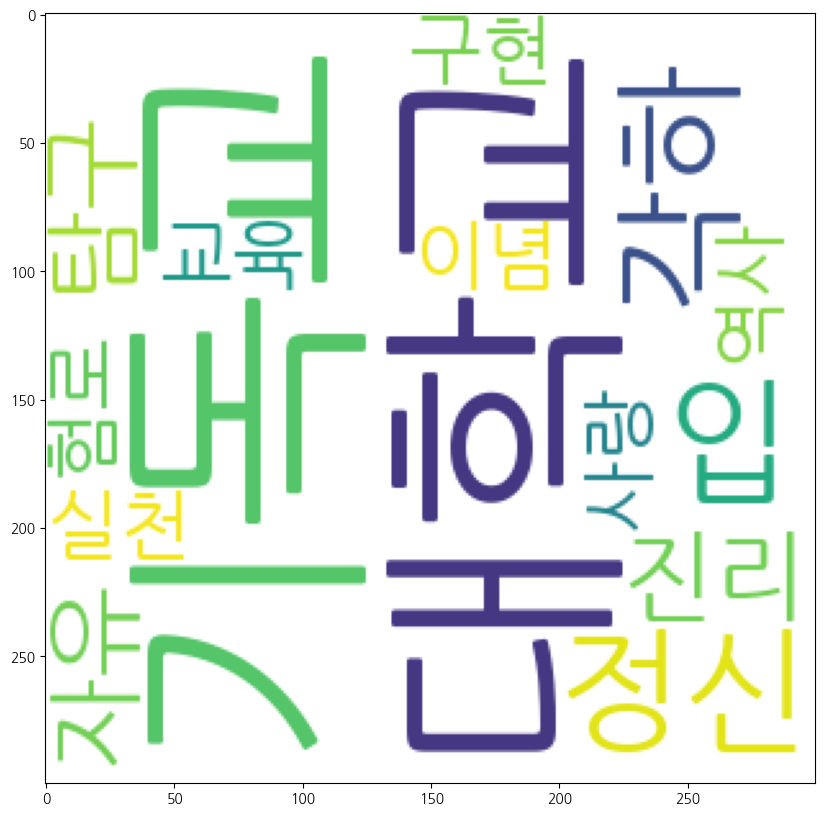

In [23]:
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path,
               background_color='white',
               max_font_size=100,
               width=300, height=300)

cloud = wc.generate_from_frequencies(dict(tag1))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(cloud)


**---------------**

In [24]:
text2 = '한신대학교는 기독교 정신에 입각하여 진리탐구, 자유구현, 사랑실천의 교육을 이념으로 역사의 험로를 따라 82년을 걸어왔습니다.'

In [25]:
sentence2 = okt.pos(text2)
print(sentence2)

[('한', 'Determiner'), ('신', 'Modifier'), ('대학교', 'Noun'), ('는', 'Josa'), ('\xa0', 'Foreign'), ('기독교', 'Noun'), ('\xa0', 'Foreign'), ('정신', 'Noun'), ('에', 'Josa'), ('\xa0', 'Foreign'), ('입', 'Noun'), ('각하', 'Noun'), ('여', 'Josa'), ('\xa0', 'Foreign'), ('진리', 'Noun'), ('탐구', 'Noun'), (',', 'Punctuation'), ('\xa0', 'Foreign'), ('자유', 'Noun'), ('구현', 'Noun'), (',', 'Punctuation'), ('\xa0', 'Foreign'), ('사랑', 'Noun'), ('실천', 'Noun'), ('의', 'Josa'), ('\xa0', 'Foreign'), ('교육', 'Noun'), ('을', 'Josa'), ('\xa0', 'Foreign'), ('이념', 'Noun'), ('으로', 'Josa'), ('\xa0', 'Foreign'), ('역사', 'Noun'), ('의', 'Josa'), ('\xa0', 'Foreign'), ('험로', 'Noun'), ('를', 'Josa'), ('\xa0', 'Foreign'), ('따라', 'Verb'), ('\xa0', 'Foreign'), ('82년', 'Number'), ('을\xa0', 'Foreign'), ('걸어왔습니다', 'Verb'), ('.', 'Punctuation')]


In [26]:
from collections import Counter           # 빈도수를 카운트하는 라이브러리
import collections

adj_list = []                             # 추출한 단어를 저장
for word, tag in sentence2:                # 반복문을 통해 sentence_tag 안의 단어, tag를 반복 수행
    if tag in ['Noun', 'Adjective']:      # 조건문으로 tag의 명사와 형용사만 추출
        adj_list.append(word)             # adj_list에 추출된 word를 추가

counts = collections.Counter(adj_list)    # adj_list를 counts에 저장
tag2 = counts.most_common()                # 가장 많은 빈도수를 tag에 저장
print(tag2)                                # 저장된 tag 출력

[('대학교', 1), ('기독교', 1), ('정신', 1), ('입', 1), ('각하', 1), ('진리', 1), ('탐구', 1), ('자유', 1), ('구현', 1), ('사랑', 1), ('실천', 1), ('교육', 1), ('이념', 1), ('역사', 1), ('험로', 1)]


In [27]:
adj_list1 = []
stopword = ['입', '각하']

for sentence2 in counts:
    p_list=okt.pos(text2)
    for word,tag in p_list:
        if word not in stopword:
            if tag in ['Noun', 'Adjective']:
                adj_list1.append(word)

counts = collections.Counter(adj_list1)
tag3 = counts.most_common()
print(tag3)

[('대학교', 15), ('기독교', 15), ('정신', 15), ('진리', 15), ('탐구', 15), ('자유', 15), ('구현', 15), ('사랑', 15), ('실천', 15), ('교육', 15), ('이념', 15), ('역사', 15), ('험로', 15)]


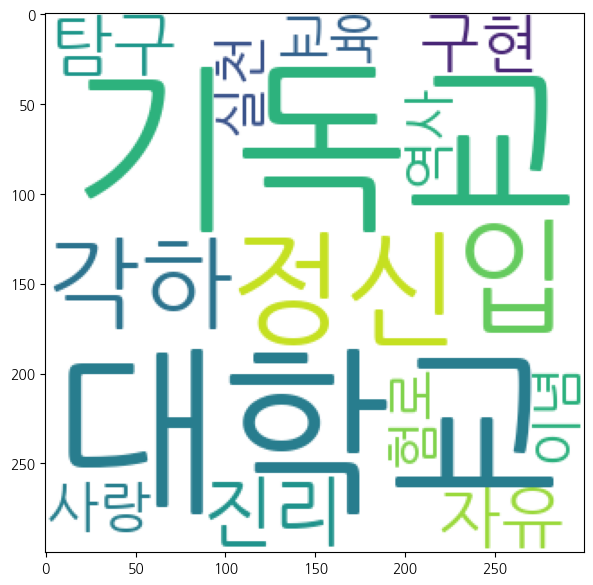

In [28]:
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path,
               background_color='white',
               max_font_size=100,
               width=300, height=300)

cloud = wc.generate_from_frequencies(dict(tag2))

import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.imshow(cloud)

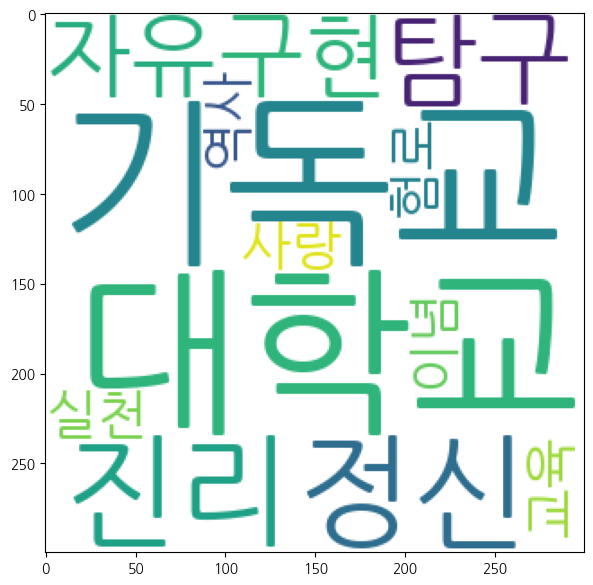

In [29]:
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path,
               background_color='white',
               max_font_size=100,
               width=300, height=300)

cloud = wc.generate_from_frequencies(dict(tag3))

import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.imshow(cloud)

**-------------------------**

## 4.2 불용어 처리_2

In [30]:
text3 = '한신대학교는 기독교 정신에 입각하여 진리탐구, 자유구현, 사랑실천의 교육을 이념으로 역사의 험로를 따라 82년을 걸어왔습니다. 지나온 역사 속에서 한신은 학문과 양심의 자유, 인권과 민주화, 민족 자주와 평화통일, 세계에 대한 책임성을 기치로 한국사회의 변혁을 주도했고, 보수 근본주의 기독교를 일깨워 한국교회의 개혁을 이끌어 왔습니다. 한신대학교는 학문 연구의 상아탑이며 동시에 학생들의 미래 설계와 준비에 도움을 주는 배움터로 학생들의 꿈이 성장하고 실현될 수 있도록 노력하고 있습니다. 한신의 교육은 신학적 영성의 깊이와 인문학적 상상력의 높이, 사회과학적 분석의 넓이와 과학적 창의성의 길이를 근간으로 융복합적인 지식의 탐구와 적용을 구현하는 교육을 지향하고 있습니다. 이를 통해 시대의 전환 속에서 가치있는 삶을 실현하는 미래지향적 인재를 길러낼 것입니다. 한신대학교의 교육은 지식정보 만을 전달하기보다 인간에 대한 존중과 예의를 바탕으로 한 ‘인간애’ 구현의 형성을 목표로 합니다. 이기심에 기초한 성공이 아니라, 타인을 존중하고 배려할 줄 아는 ‘더불어 사는 삶’을 지향하는 인간상을 지향합니다. 한신대학교는 여러분이 소중한 꿈을 실현하도록 돕고 응원합니다.'

In [31]:
okt = Okt()
nouns = okt.nouns(text3)
print(nouns)

['대학교', '기독교', '정신', '입', '각하', '진리', '탐구', '자유', '구현', '사랑', '실천', '교육', '이념', '역사', '험로', '지나', '온', '역사', '속', '한신', '학문', '양심', '자유', '인권', '민주화', '민족', '자주', '평화통일', '세계', '대한', '책임', '한국사', '회의', '변혁', '보수', '근본', '주의', '기독교', '일', '한국', '교회', '개혁', '대학교', '학문', '연구', '상아탑', '동시', '학생', '미래', '설계', '준비', '도움', '배움터', '학생', '꿈', '실현', '수', '노력', '한신', '교육', '학적', '영성', '깊이', '인문학', '상상력', '높이', '사회과학', '분석', '넓이', '과학', '창의성', '길이', '근간', '융', '복합', '지식', '탐구', '적용', '구현', '교육', '지향', '통해', '시대', '전환', '속', '가치', '삶', '실현', '미래', '지향', '인재', '낼', '것', '대학교', '교육', '지식', '정보', '전달', '인간', '대한', '존중', '예의', '바탕', '인간', '애', '구현', '형성', '목표', '이기심', '기초', '성공', '타인', '존중', '배려', '줄', '삶', '지향', '인간', '지향', '대학교', '여러분', '꿈', '실현', '응원']


In [32]:
word_list = pd.Series(nouns)
data = word_list.value_counts()

df = data.to_frame()
#print(df)
df

,0
대학교,4
지향,4
교육,4
실현,3
구현,3
...,...
일,1
주의,1
근본,1
보수,1


<Figure size 640x480 with 0 Axes>

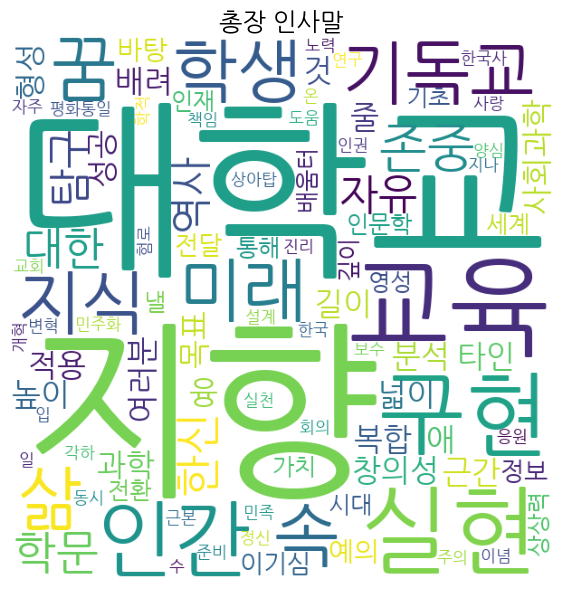

In [33]:
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path,
               background_color="white",
               width=300, height=300,
               scale=2.0, max_font_size=150)

cloud = wc.generate_from_frequencies(data)

import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(7,10))
plt.axis("off")
plt.title("총장 인사말", fontsize = 18)

plt.imshow(cloud)

In [34]:
okt = Okt()
nouns1 = okt.nouns(text3)

words1 = [n for n in nouns1 if len(n) > 1]
count1 = Counter(words1)
print(count1)

Counter({'대학교': 4, '교육': 4, '지향': 4, '구현': 3, '실현': 3, '인간': 3, '기독교': 2, '탐구': 2, '자유': 2, '역사': 2, '한신': 2, '학문': 2, '대한': 2, '학생': 2, '미래': 2, '지식': 2, '존중': 2, '정신': 1, '각하': 1, '진리': 1, '사랑': 1, '실천': 1, '이념': 1, '험로': 1, '지나': 1, '양심': 1, '인권': 1, '민주화': 1, '민족': 1, '자주': 1, '평화통일': 1, '세계': 1, '책임': 1, '한국사': 1, '회의': 1, '변혁': 1, '보수': 1, '근본': 1, '주의': 1, '한국': 1, '교회': 1, '개혁': 1, '연구': 1, '상아탑': 1, '동시': 1, '설계': 1, '준비': 1, '도움': 1, '배움터': 1, '노력': 1, '학적': 1, '영성': 1, '깊이': 1, '인문학': 1, '상상력': 1, '높이': 1, '사회과학': 1, '분석': 1, '넓이': 1, '과학': 1, '창의성': 1, '길이': 1, '근간': 1, '복합': 1, '적용': 1, '통해': 1, '시대': 1, '전환': 1, '가치': 1, '인재': 1, '정보': 1, '전달': 1, '예의': 1, '바탕': 1, '형성': 1, '목표': 1, '이기심': 1, '기초': 1, '성공': 1, '타인': 1, '배려': 1, '여러분': 1, '응원': 1})


In [35]:
word_list = pd.Series(words1)
data1 = word_list.value_counts()

df1 = data1.to_frame()
#print(df1)
df1

,0
대학교,4
교육,4
지향,4
실현,3
인간,3
...,...
주의,1
근본,1
보수,1
변혁,1


<Figure size 640x480 with 0 Axes>

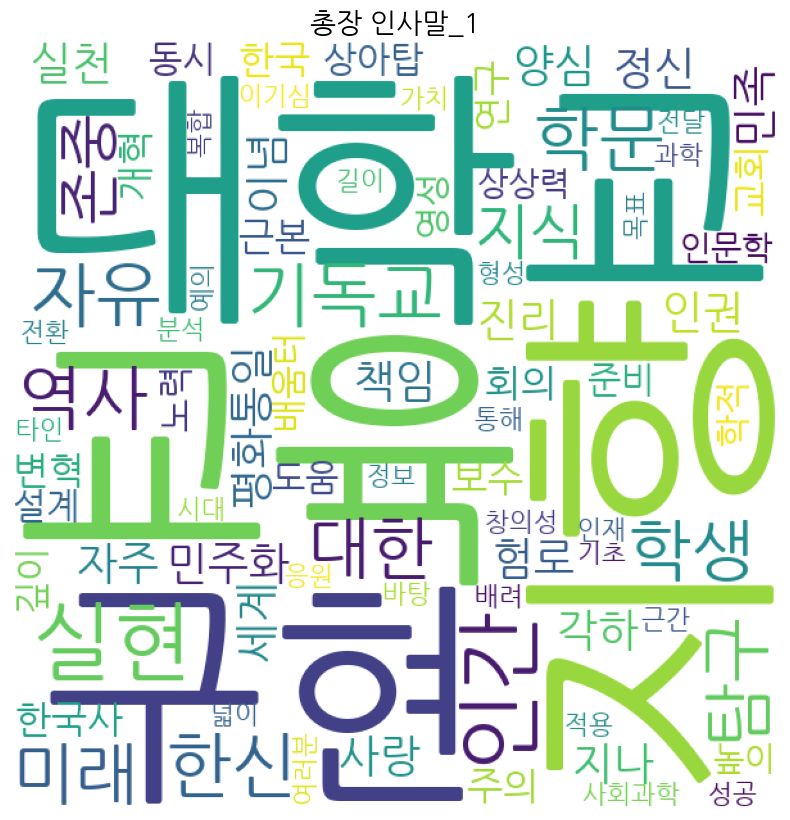

In [36]:
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path,
               background_color="white",
               width=300, height=300,
               scale=2.0, max_font_size=150)

cloud = wc.generate_from_frequencies(count1)

import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("총장 인사말_1", fontsize = 20)
plt.imshow(cloud)

In [37]:
okt = Okt()
nouns2 = okt.nouns(text3)

words2 = [n for n in nouns2 if len(n) > 2]
count2 = Counter(words2)
print(count2)

Counter({'대학교': 4, '기독교': 2, '민주화': 1, '평화통일': 1, '한국사': 1, '상아탑': 1, '배움터': 1, '인문학': 1, '상상력': 1, '사회과학': 1, '창의성': 1, '이기심': 1, '여러분': 1})


In [38]:
word_list = pd.Series(words2)
data2 = word_list.value_counts()

df2 = data2.to_frame()
#print(df2)
df2

,0
대학교,4
기독교,2
민주화,1
평화통일,1
한국사,1
상아탑,1
배움터,1
인문학,1
상상력,1
사회과학,1


<Figure size 640x480 with 0 Axes>

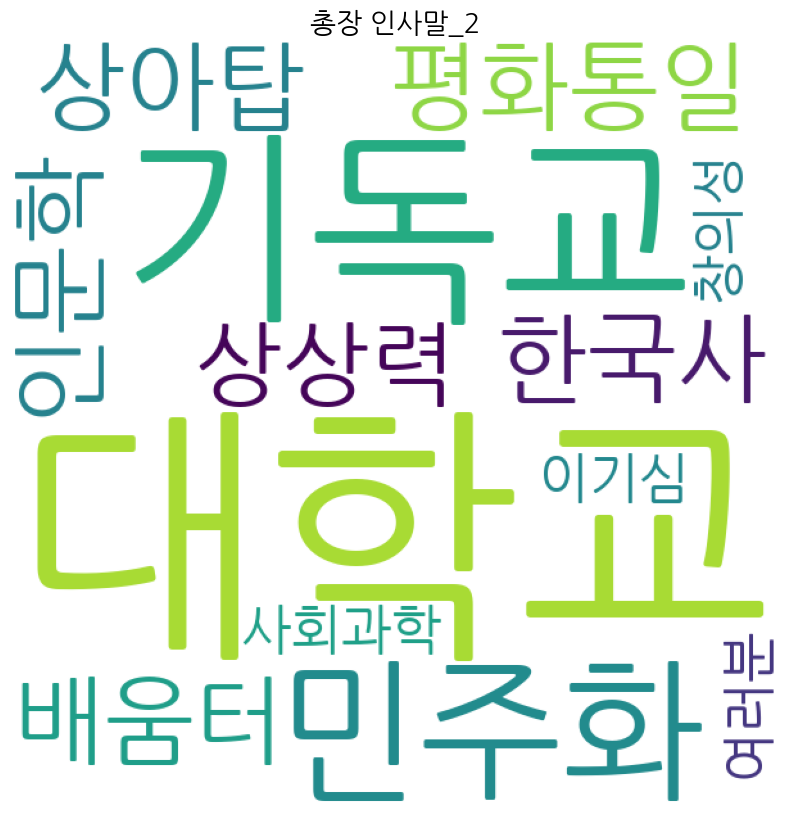

In [39]:
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path,
               background_color="white",
               width=300, height=300,
               scale=2.0, max_font_size=150)

cloud = wc.generate_from_frequencies(count2)

import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("총장 인사말_2", fontsize = 20)

plt.imshow(cloud)

# **-------------------------------------------------**

# 5.그래프 시각화

In [40]:
text5 = '한신대학교는 기독교 정신에 입각하여 진리탐구, 자유구현, 사랑실천의 교육을 이념으로 역사의 험로를 따라 82년을 걸어왔습니다. 지나온 역사 속에서 한신은 학문과 양심의 자유, 인권과 민주화, 민족 자주와 평화통일, 세계에 대한 책임성을 기치로 한국사회의 변혁을 주도했고, 보수 근본주의 기독교를 일깨워 한국교회의 개혁을 이끌어 왔습니다. 한신대학교는 학문 연구의 상아탑이며 동시에 학생들의 미래 설계와 준비에 도움을 주는 배움터로 학생들의 꿈이 성장하고 실현될 수 있도록 노력하고 있습니다. 한신의 교육은 신학적 영성의 깊이와 인문학적 상상력의 높이, 사회과학적 분석의 넓이와 과학적 창의성의 길이를 근간으로 융복합적인 지식의 탐구와 적용을 구현하는 교육을 지향하고 있습니다. 이를 통해 시대의 전환 속에서 가치있는 삶을 실현하는 미래지향적 인재를 길러낼 것입니다. 한신대학교의 교육은 지식정보 만을 전달하기보다 인간에 대한 존중과 예의를 바탕으로 한 ‘인간애’ 구현의 형성을 목표로 합니다. 이기심에 기초한 성공이 아니라, 타인을 존중하고 배려할 줄 아는 ‘더불어 사는 삶’을 지향하는 인간상을 지향합니다. 한신대학교는 여러분이 소중한 꿈을 실현하도록 돕고 응원합니다.'

In [41]:
okt = Okt()
words5 = okt.pos(text5)
print(words5)

[('한', 'Determiner'), ('신', 'Modifier'), ('대학교', 'Noun'), ('는', 'Josa'), ('\xa0', 'Foreign'), ('기독교', 'Noun'), ('\xa0', 'Foreign'), ('정신', 'Noun'), ('에', 'Josa'), ('\xa0', 'Foreign'), ('입', 'Noun'), ('각하', 'Noun'), ('여', 'Josa'), ('\xa0', 'Foreign'), ('진리', 'Noun'), ('탐구', 'Noun'), (',', 'Punctuation'), ('\xa0', 'Foreign'), ('자유', 'Noun'), ('구현', 'Noun'), (',', 'Punctuation'), ('\xa0', 'Foreign'), ('사랑', 'Noun'), ('실천', 'Noun'), ('의', 'Josa'), ('\xa0', 'Foreign'), ('교육', 'Noun'), ('을', 'Josa'), ('\xa0', 'Foreign'), ('이념', 'Noun'), ('으로', 'Josa'), ('\xa0', 'Foreign'), ('역사', 'Noun'), ('의', 'Josa'), ('\xa0', 'Foreign'), ('험로', 'Noun'), ('를', 'Josa'), ('\xa0', 'Foreign'), ('따라', 'Verb'), ('\xa0', 'Foreign'), ('82년', 'Number'), ('을\xa0', 'Foreign'), ('걸어왔습니다', 'Verb'), ('.', 'Punctuation'), ('\xa0', 'Foreign'), ('지나', 'Noun'), ('온', 'Noun'), ('\xa0', 'Foreign'), ('역사', 'Noun'), ('\xa0', 'Foreign'), ('속', 'Noun'), ('에서', 'Josa'), ('\xa0', 'Foreign'), ('한신', 'Noun'), ('은', 'Josa'), ('\xa0', 

In [42]:
word_list5 = []
stopword = ['속', '입', '온', '점', '일', '줄', '낼', '애', '각하', '지나', '정말','왜','말','그','없다','정도','걸','뭐','이건','영화','완전','좀','있는','거','나','이','볼','입니다','것','이런','더','수','때', '또']

for sentence in words5:
    s_list=okt.pos(text5)
    for word,tag in s_list:
        if word not in stopword:
            if tag in ['Noun', 'Adjective']:
                word_list5.append(word)

counts=collections.Counter(word_list5)
tag5 = counts.most_common(50)
print(tag5)

[('대학교', 1596), ('교육', 1596), ('지향', 1596), ('구현', 1197), ('실현', 1197), ('인간', 1197), ('기독교', 798), ('탐구', 798), ('자유', 798), ('역사', 798), ('한신', 798), ('학문', 798), ('대한', 798), ('학생', 798), ('미래', 798), ('꿈', 798), ('있습니다', 798), ('지식', 798), ('삶', 798), ('존중', 798), ('정신', 399), ('진리', 399), ('사랑', 399), ('실천', 399), ('이념', 399), ('험로', 399), ('양심', 399), ('인권', 399), ('민주화', 399), ('민족', 399), ('자주', 399), ('평화통일', 399), ('세계', 399), ('책임', 399), ('한국사', 399), ('회의', 399), ('변혁', 399), ('주도했고', 399), ('보수', 399), ('근본', 399), ('주의', 399), ('한국', 399), ('교회', 399), ('개혁', 399), ('연구', 399), ('상아탑', 399), ('동시', 399), ('설계', 399), ('준비', 399), ('도움', 399)]


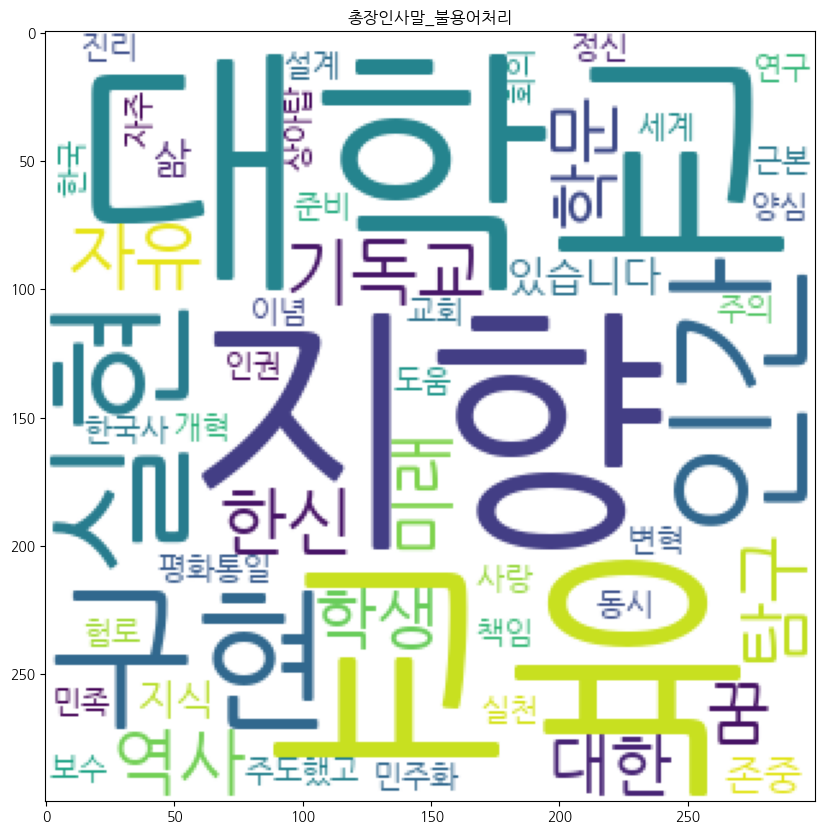

In [43]:
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path,
               background_color='white',
               max_font_size=100,
               width=300, height=300)

cloud = wc.generate_from_frequencies(dict(tag5))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('총장인사말_불용어처리')
plt.imshow(cloud)

## 5.1 그래프 시각화

In [45]:
text5 = '한신대학교는 기독교 정신에 입각하여 진리탐구, 자유구현, 사랑실천의 교육을 이념으로 역사의 험로를 따라 82년을 걸어왔습니다. 지나온 역사 속에서 한신은 학문과 양심의 자유, 인권과 민주화, 민족 자주와 평화통일, 세계에 대한 책임성을 기치로 한국사회의 변혁을 주도했고, 보수 근본주의 기독교를 일깨워 한국교회의 개혁을 이끌어 왔습니다. 한신대학교는 학문 연구의 상아탑이며 동시에 학생들의 미래 설계와 준비에 도움을 주는 배움터로 학생들의 꿈이 성장하고 실현될 수 있도록 노력하고 있습니다. 한신의 교육은 신학적 영성의 깊이와 인문학적 상상력의 높이, 사회과학적 분석의 넓이와 과학적 창의성의 길이를 근간으로 융복합적인 지식의 탐구와 적용을 구현하는 교육을 지향하고 있습니다. 이를 통해 시대의 전환 속에서 가치있는 삶을 실현하는 미래지향적 인재를 길러낼 것입니다. 한신대학교의 교육은 지식정보 만을 전달하기보다 인간에 대한 존중과 예의를 바탕으로 한 ‘인간애’ 구현의 형성을 목표로 합니다. 이기심에 기초한 성공이 아니라, 타인을 존중하고 배려할 줄 아는 ‘더불어 사는 삶’을 지향하는 인간상을 지향합니다. 한신대학교는 여러분이 소중한 꿈을 실현하도록 돕고 응원합니다.'

In [44]:
okt = Okt()
words5 = okt.nouns(text5)
print(words5)

['대학교', '기독교', '정신', '입', '각하', '진리', '탐구', '자유', '구현', '사랑', '실천', '교육', '이념', '역사', '험로', '지나', '온', '역사', '속', '한신', '학문', '양심', '자유', '인권', '민주화', '민족', '자주', '평화통일', '세계', '대한', '책임', '한국사', '회의', '변혁', '보수', '근본', '주의', '기독교', '일', '한국', '교회', '개혁', '대학교', '학문', '연구', '상아탑', '동시', '학생', '미래', '설계', '준비', '도움', '배움터', '학생', '꿈', '실현', '수', '노력', '한신', '교육', '학적', '영성', '깊이', '인문학', '상상력', '높이', '사회과학', '분석', '넓이', '과학', '창의성', '길이', '근간', '융', '복합', '지식', '탐구', '적용', '구현', '교육', '지향', '통해', '시대', '전환', '속', '가치', '삶', '실현', '미래', '지향', '인재', '낼', '것', '대학교', '교육', '지식', '정보', '전달', '인간', '대한', '존중', '예의', '바탕', '인간', '애', '구현', '형성', '목표', '이기심', '기초', '성공', '타인', '존중', '배려', '줄', '삶', '지향', '인간', '지향', '대학교', '여러분', '꿈', '실현', '응원']


In [45]:
word_list = pd.Series(words5)        # words = [n for n in nouns if len(n) > 1]
data5 = word_list.value_counts()

df5 = data.to_frame()
df5

,0
대학교,4
지향,4
교육,4
실현,3
구현,3
...,...
일,1
주의,1
근본,1
보수,1


In [46]:
word_list = pd.Series(words5)        # words = [n for n in nouns if len(n) > 1]
data5 = word_list.value_counts()     #.head(30) #.tail(30)

df5 = data5.to_frame()
df5.to_csv('test.csv')
df5 = pd.read_csv('test.csv', names=['단어','빈도'])
df5

,단어,빈도
0,NaN,0
1,대학교,4
2,지향,4
3,교육,4
4,실현,3
...,...,...
91,일,1
92,주의,1
93,근본,1
94,보수,1


In [47]:
df5.dropna(axis=0, inplace=True)    # df.dropna(axis=0) 결측값이 있는 행 전체 제거, df.dropna(axis=1)열 전체 제거, df[ ].dropna() 선택행 or 열 제거
df5

,단어,빈도
1,대학교,4
2,지향,4
3,교육,4
4,실현,3
5,구현,3
...,...,...
91,일,1
92,주의,1
93,근본,1
94,보수,1


In [48]:
word_list = pd.Series(words5)       # words = [n for n in nouns if len(n) > 1]
data6 = word_list.value_counts().head(30)  #.head(30) #.tail(30)

df6 = data6.to_frame()
df6.to_excel('test.xlsx')
df6 = pd.read_excel('test.xlsx', names=['단어','빈도'])

df6.dropna(axis=0, inplace=True)
df6

,단어,빈도
0,대학교,4
1,지향,4
2,교육,4
3,실현,3
4,구현,3
5,인간,3
6,속,2
7,꿈,2
8,기독교,2
9,미래,2


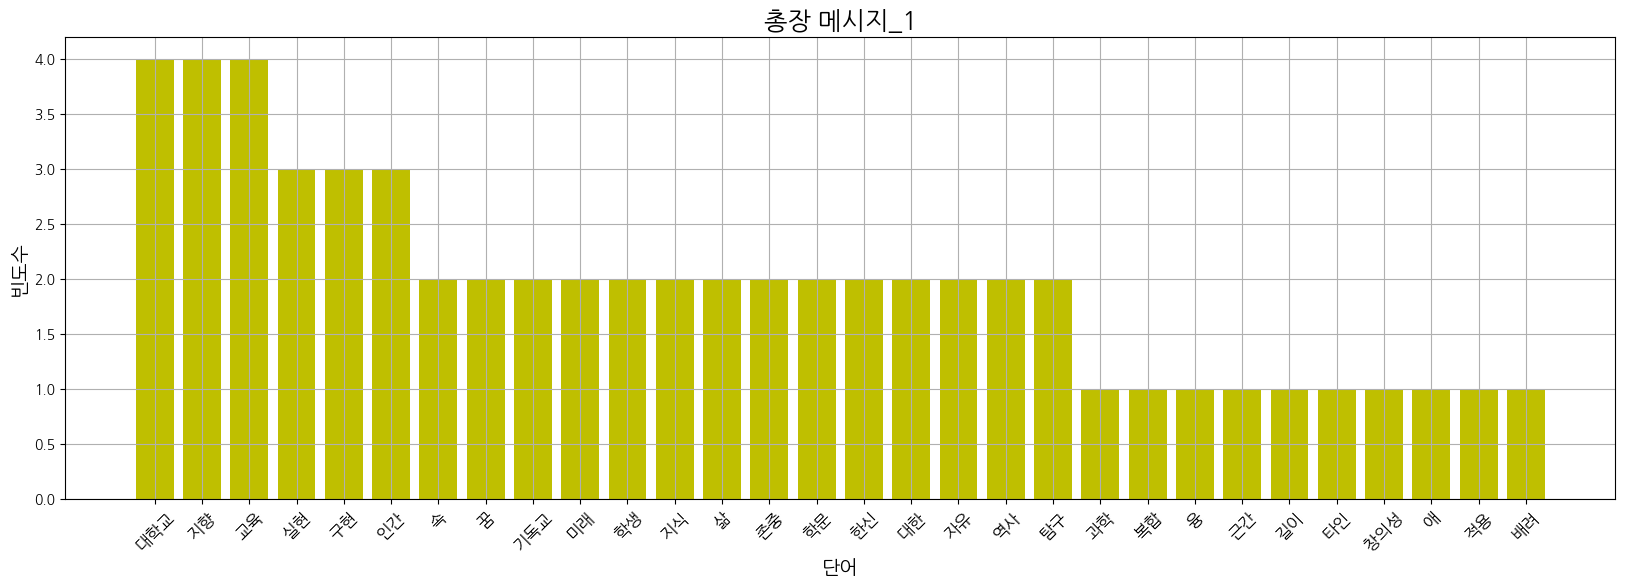

<Figure size 640x480 with 0 Axes>

In [49]:
fig = plt.figure(figsize=(20,6))

x = df6['단어']
y = df6['빈도']

plt.bar(x,y, color='y')
plt.title('총장 메시지_1', fontsize=18)
plt.xlabel('단어', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, fontsize=12)

plt.show()
plt.savefig('picture1_1.png')

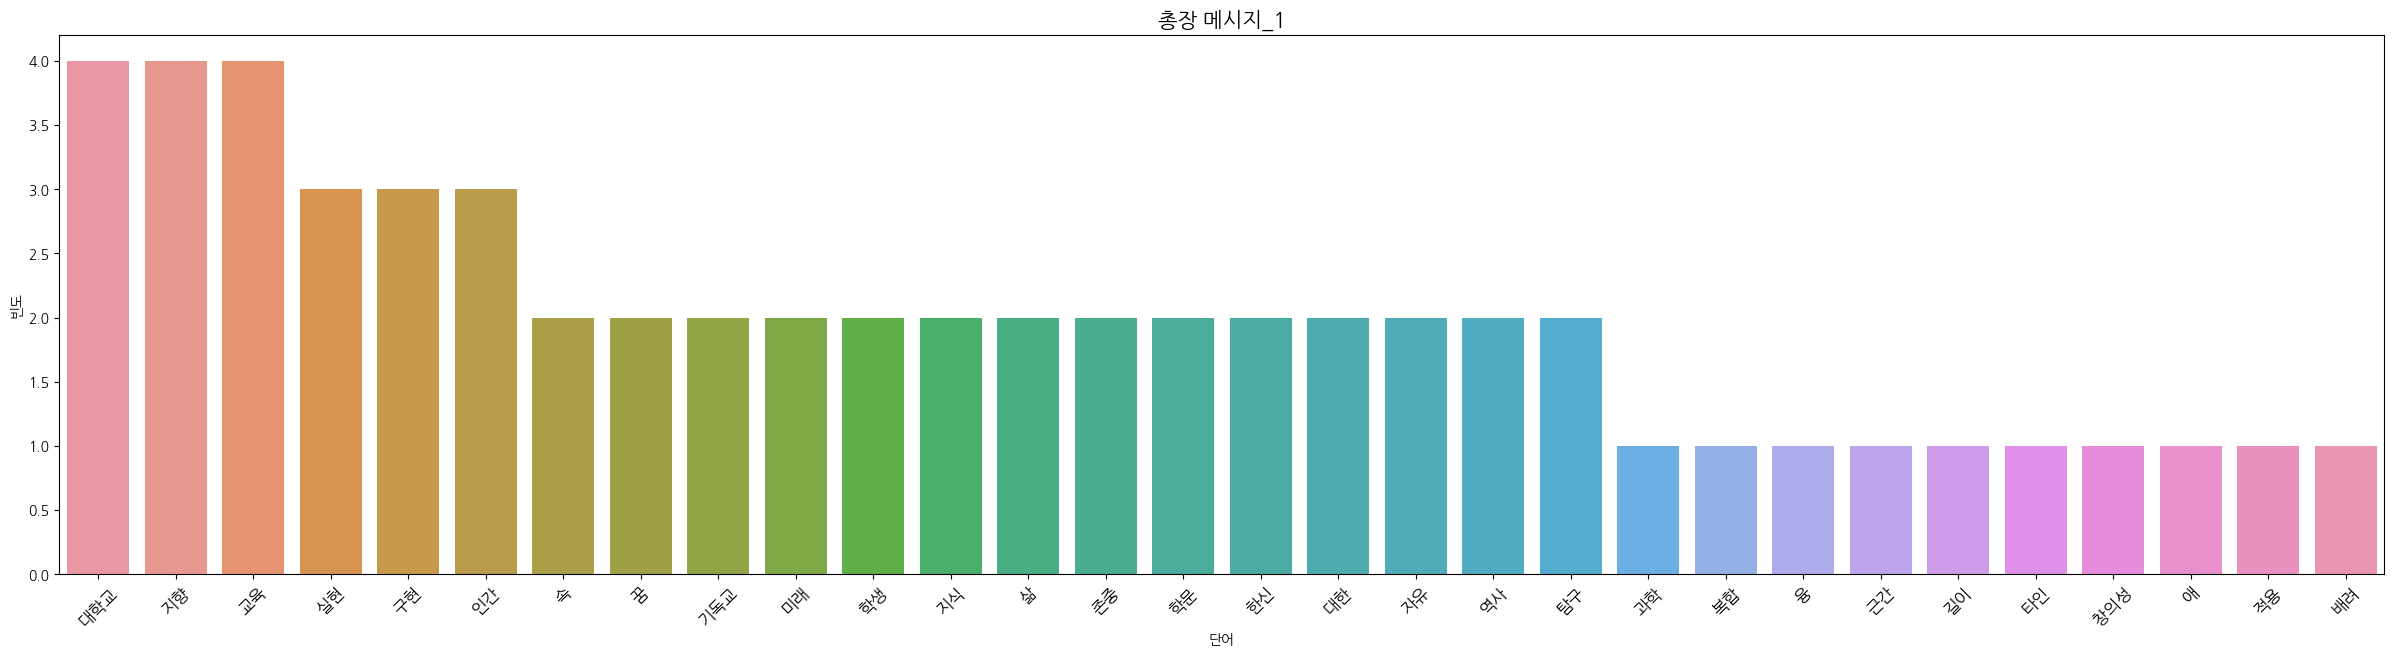

In [50]:
plt.rcParams["figure.figsize"] = (30, 7)
sns.barplot(x='단어', y='빈도', data=df6)

plt.title('총장 메시지_1', fontsize = 15)
plt.xticks(rotation=45, fontsize=12)

#plt.show()
plt.savefig('picture1_2.png')

## 5.2 단어 및 빈도수 추출 및 시각화

In [51]:
text5 = '한신대학교는 기독교 정신에 입각하여 진리탐구, 자유구현, 사랑실천의 교육을 이념으로 역사의 험로를 따라 82년을 걸어왔습니다. 지나온 역사 속에서 한신은 학문과 양심의 자유, 인권과 민주화, 민족 자주와 평화통일, 세계에 대한 책임성을 기치로 한국사회의 변혁을 주도했고, 보수 근본주의 기독교를 일깨워 한국교회의 개혁을 이끌어 왔습니다. 한신대학교는 학문 연구의 상아탑이며 동시에 학생들의 미래 설계와 준비에 도움을 주는 배움터로 학생들의 꿈이 성장하고 실현될 수 있도록 노력하고 있습니다. 한신의 교육은 신학적 영성의 깊이와 인문학적 상상력의 높이, 사회과학적 분석의 넓이와 과학적 창의성의 길이를 근간으로 융복합적인 지식의 탐구와 적용을 구현하는 교육을 지향하고 있습니다. 이를 통해 시대의 전환 속에서 가치있는 삶을 실현하는 미래지향적 인재를 길러낼 것입니다. 한신대학교의 교육은 지식정보 만을 전달하기보다 인간에 대한 존중과 예의를 바탕으로 한 ‘인간애’ 구현의 형성을 목표로 합니다. 이기심에 기초한 성공이 아니라, 타인을 존중하고 배려할 줄 아는 ‘더불어 사는 삶’을 지향하는 인간상을 지향합니다. 한신대학교는 여러분이 소중한 꿈을 실현하도록 돕고 응원합니다.'

In [52]:
okt = Okt()
nouns = okt.nouns(text5)
words1 = [n for n in nouns if len(n) > 1]
count = Counter(words1)
print(count)

Counter({'대학교': 4, '교육': 4, '지향': 4, '구현': 3, '실현': 3, '인간': 3, '기독교': 2, '탐구': 2, '자유': 2, '역사': 2, '한신': 2, '학문': 2, '대한': 2, '학생': 2, '미래': 2, '지식': 2, '존중': 2, '정신': 1, '각하': 1, '진리': 1, '사랑': 1, '실천': 1, '이념': 1, '험로': 1, '지나': 1, '양심': 1, '인권': 1, '민주화': 1, '민족': 1, '자주': 1, '평화통일': 1, '세계': 1, '책임': 1, '한국사': 1, '회의': 1, '변혁': 1, '보수': 1, '근본': 1, '주의': 1, '한국': 1, '교회': 1, '개혁': 1, '연구': 1, '상아탑': 1, '동시': 1, '설계': 1, '준비': 1, '도움': 1, '배움터': 1, '노력': 1, '학적': 1, '영성': 1, '깊이': 1, '인문학': 1, '상상력': 1, '높이': 1, '사회과학': 1, '분석': 1, '넓이': 1, '과학': 1, '창의성': 1, '길이': 1, '근간': 1, '복합': 1, '적용': 1, '통해': 1, '시대': 1, '전환': 1, '가치': 1, '인재': 1, '정보': 1, '전달': 1, '예의': 1, '바탕': 1, '형성': 1, '목표': 1, '이기심': 1, '기초': 1, '성공': 1, '타인': 1, '배려': 1, '여러분': 1, '응원': 1})


In [53]:
nouns = okt.nouns(text5)
words2 = [n for n in nouns if len(n) > 2]
count = Counter(words2)
print(count)
#df.sort_values('빈도')

Counter({'대학교': 4, '기독교': 2, '민주화': 1, '평화통일': 1, '한국사': 1, '상아탑': 1, '배움터': 1, '인문학': 1, '상상력': 1, '사회과학': 1, '창의성': 1, '이기심': 1, '여러분': 1})


In [54]:
word_list = pd.Series(words1)        # words = [n for n in nouns if len(n) > 1]
data7 = word_list.value_counts().head(30)

df7 = data7.to_frame()
df7.to_csv('test.csv')
df7 = pd.read_csv('test.csv', names=['단어','빈도'])
df7.dropna(axis=0, inplace=True)
df7

,단어,빈도
1,대학교,4
2,교육,4
3,지향,4
4,실현,3
5,인간,3
6,구현,3
7,미래,2
8,지식,2
9,대한,2
10,존중,2


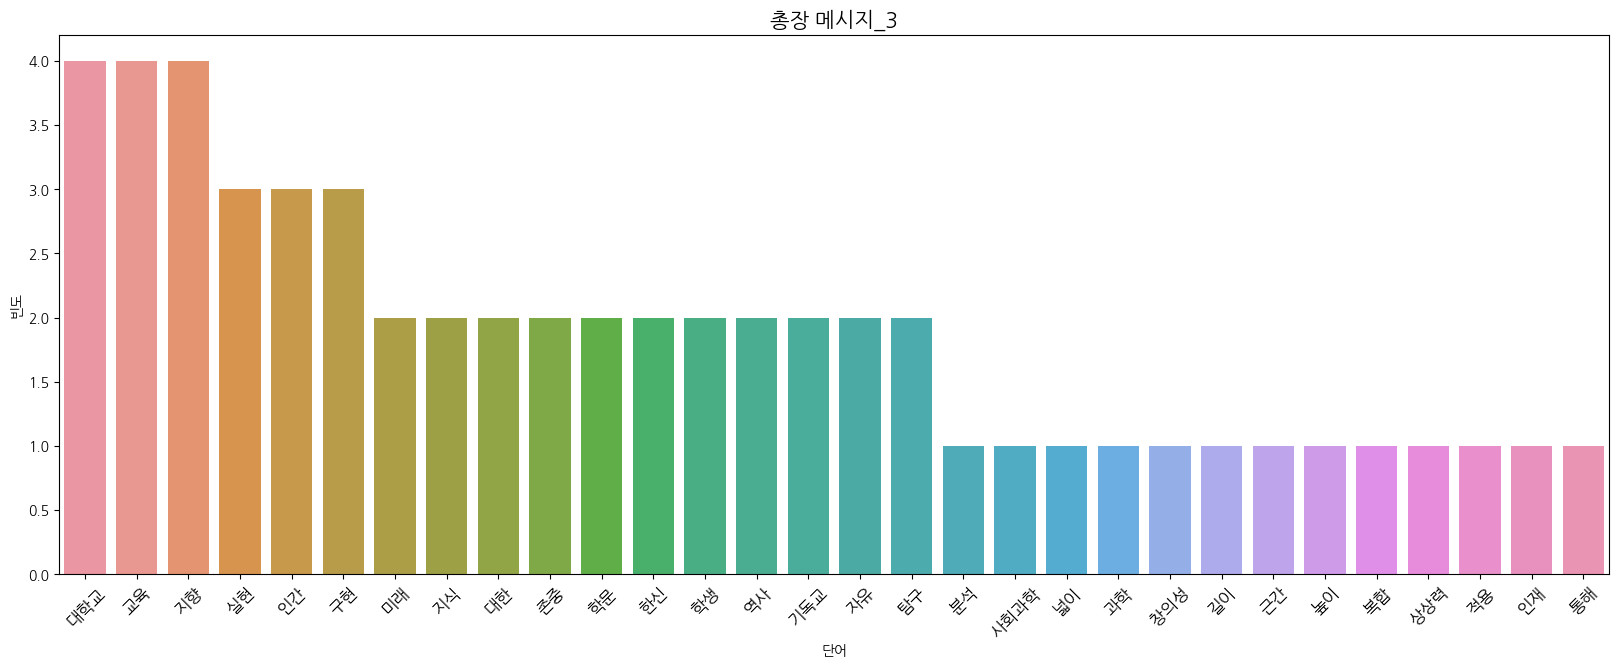

In [55]:
plt.rcParams["figure.figsize"] = (20, 7)

sns.barplot(x='단어', y='빈도', data=df7)

plt.title('총장 메시지_3', fontsize = 15)
plt.xticks(rotation=45, fontsize=12)

#plt.show()
plt.savefig('picture_3.png')

**---------------------------------**

# 6.전처리 실습 및 시각화 실습

In [56]:
text7 = '한신대학교는 기독교 정신에 입각하여 진리탐구, 자유구현, 사랑실천의 교육을 이념으로 역사의 험로를 따라 82년을 걸어왔습니다. 지나온 역사 속에서 한신은 학문과 양심의 자유, 인권과 민주화, 민족 자주와 평화통일, 세계에 대한 책임성을 기치로 한국사회의 변혁을 주도했고, 보수 근본주의 기독교를 일깨워 한국교회의 개혁을 이끌어 왔습니다. 한신대학교는 학문 연구의 상아탑이며 동시에 학생들의 미래 설계와 준비에 도움을 주는 배움터로 학생들의 꿈이 성장하고 실현될 수 있도록 노력하고 있습니다. 한신의 교육은 신학적 영성의 깊이와 인문학적 상상력의 높이, 사회과학적 분석의 넓이와 과학적 창의성의 길이를 근간으로 융복합적인 지식의 탐구와 적용을 구현하는 교육을 지향하고 있습니다. 이를 통해 시대의 전환 속에서 가치있는 삶을 실현하는 미래지향적 인재를 길러낼 것입니다. 한신대학교의 교육은 지식정보 만을 전달하기보다 인간에 대한 존중과 예의를 바탕으로 한 ‘인간애’ 구현의 형성을 목표로 합니다. 이기심에 기초한 성공이 아니라, 타인을 존중하고 배려할 줄 아는 ‘더불어 사는 삶’을 지향하는 인간상을 지향합니다. 한신대학교는 여러분이 소중한 꿈을 실현하도록 돕고 응원합니다.'

In [57]:
words6 = okt.nouns(text7)
print(words6)

['대학교', '기독교', '정신', '입', '각하', '진리', '탐구', '자유', '구현', '사랑', '실천', '교육', '이념', '역사', '험로', '지나', '온', '역사', '속', '한신', '학문', '양심', '자유', '인권', '민주화', '민족', '자주', '평화통일', '세계', '대한', '책임', '한국사', '회의', '변혁', '보수', '근본', '주의', '기독교', '일', '한국', '교회', '개혁', '대학교', '학문', '연구', '상아탑', '동시', '학생', '미래', '설계', '준비', '도움', '배움터', '학생', '꿈', '실현', '수', '노력', '한신', '교육', '학적', '영성', '깊이', '인문학', '상상력', '높이', '사회과학', '분석', '넓이', '과학', '창의성', '길이', '근간', '융', '복합', '지식', '탐구', '적용', '구현', '교육', '지향', '통해', '시대', '전환', '속', '가치', '삶', '실현', '미래', '지향', '인재', '낼', '것', '대학교', '교육', '지식', '정보', '전달', '인간', '대한', '존중', '예의', '바탕', '인간', '애', '구현', '형성', '목표', '이기심', '기초', '성공', '타인', '존중', '배려', '줄', '삶', '지향', '인간', '지향', '대학교', '여러분', '꿈', '실현', '응원']


In [58]:
noun_list = []
stop_words = ['입', '각하', '동시']

for text6 in words6:
    for noun in okt.nouns(text7):
        if noun not in stop_words:
            noun_list.append(noun)

counts=collections.Counter(noun_list)
tag6=counts.most_common(50)
print(tag6)
#noun_list[:10]

[('대학교', 496), ('교육', 496), ('지향', 496), ('구현', 372), ('실현', 372), ('인간', 372), ('기독교', 248), ('탐구', 248), ('자유', 248), ('역사', 248), ('속', 248), ('한신', 248), ('학문', 248), ('대한', 248), ('학생', 248), ('미래', 248), ('꿈', 248), ('지식', 248), ('삶', 248), ('존중', 248), ('정신', 124), ('진리', 124), ('사랑', 124), ('실천', 124), ('이념', 124), ('험로', 124), ('지나', 124), ('온', 124), ('양심', 124), ('인권', 124), ('민주화', 124), ('민족', 124), ('자주', 124), ('평화통일', 124), ('세계', 124), ('책임', 124), ('한국사', 124), ('회의', 124), ('변혁', 124), ('보수', 124), ('근본', 124), ('주의', 124), ('일', 124), ('한국', 124), ('교회', 124), ('개혁', 124), ('연구', 124), ('상아탑', 124), ('설계', 124), ('준비', 124)]


In [59]:
words7 = [n for n in noun_list if len(n) > 1]
count7 = Counter(words7)
print(count7)

Counter({'대학교': 496, '교육': 496, '지향': 496, '구현': 372, '실현': 372, '인간': 372, '기독교': 248, '탐구': 248, '자유': 248, '역사': 248, '한신': 248, '학문': 248, '대한': 248, '학생': 248, '미래': 248, '지식': 248, '존중': 248, '정신': 124, '진리': 124, '사랑': 124, '실천': 124, '이념': 124, '험로': 124, '지나': 124, '양심': 124, '인권': 124, '민주화': 124, '민족': 124, '자주': 124, '평화통일': 124, '세계': 124, '책임': 124, '한국사': 124, '회의': 124, '변혁': 124, '보수': 124, '근본': 124, '주의': 124, '한국': 124, '교회': 124, '개혁': 124, '연구': 124, '상아탑': 124, '설계': 124, '준비': 124, '도움': 124, '배움터': 124, '노력': 124, '학적': 124, '영성': 124, '깊이': 124, '인문학': 124, '상상력': 124, '높이': 124, '사회과학': 124, '분석': 124, '넓이': 124, '과학': 124, '창의성': 124, '길이': 124, '근간': 124, '복합': 124, '적용': 124, '통해': 124, '시대': 124, '전환': 124, '가치': 124, '인재': 124, '정보': 124, '전달': 124, '예의': 124, '바탕': 124, '형성': 124, '목표': 124, '이기심': 124, '기초': 124, '성공': 124, '타인': 124, '배려': 124, '여러분': 124, '응원': 124})


<Figure size 2000x700 with 0 Axes>

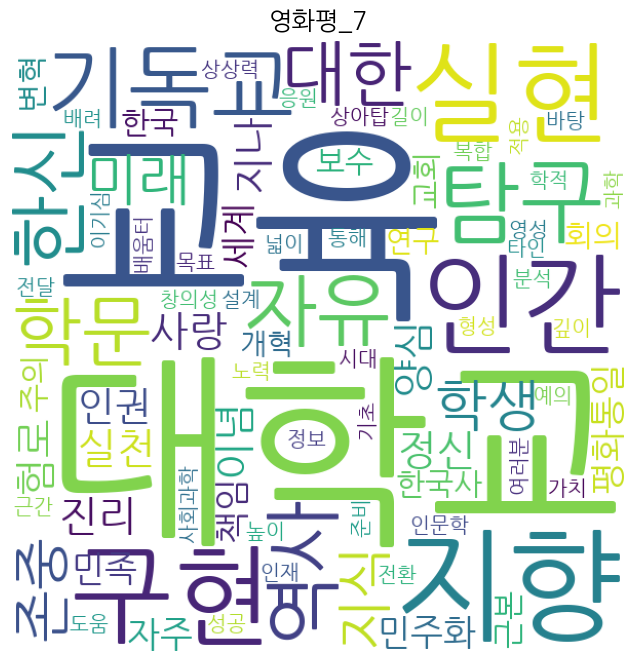

In [60]:
from wordcloud import WordCloud

wc = WordCloud(font_path = font_path,
               background_color='white',
               max_font_size=100,
               width=300, height=300,
               scale=2.0)

cloud = wc.generate_from_frequencies(dict(count7))

import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,8))
plt.axis("off")
plt.title("영화평_7", fontsize = 18)

plt.imshow(cloud)
plt.savefig('picture7.png')

In [61]:
word_list = pd.Series(words7)
data7 = word_list.value_counts()

df7 = data.to_frame()
df7

,0
대학교,4
지향,4
교육,4
실현,3
구현,3
...,...
일,1
주의,1
근본,1
보수,1


In [62]:
word_list = pd.Series(words7)        # words = [n for n in nouns if len(n) > 1]
data7 = word_list.value_counts().head(30)     #.head(30) #.tail(30)

df7 = data7.to_frame()
df7.to_csv('test.csv')
df7 = pd.read_csv('test.csv', names=['단어','빈도'])
df7.dropna(axis=0, inplace=True)
df7

,단어,빈도
1,대학교,496
2,지향,496
3,교육,496
4,실현,372
5,구현,372
6,인간,372
7,한신,248
8,기독교,248
9,미래,248
10,학생,248


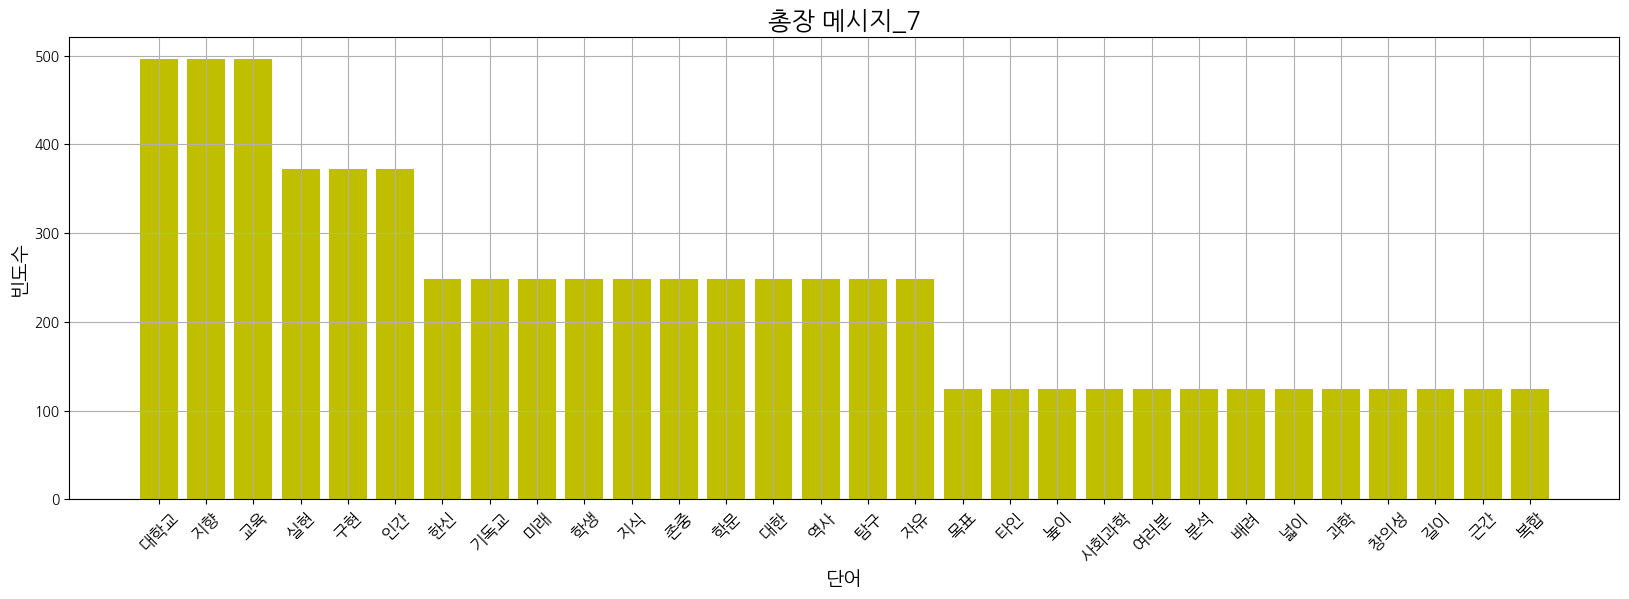

<Figure size 2000x700 with 0 Axes>

In [63]:
fig = plt.figure(figsize=(20,6))

x = df7['단어']
y = df7['빈도']

plt.bar(x,y, color='y')
plt.title('총장 메시지_7', fontsize=18)
plt.xlabel('단어', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, fontsize=12)

plt.show()
plt.savefig('picture7.png')

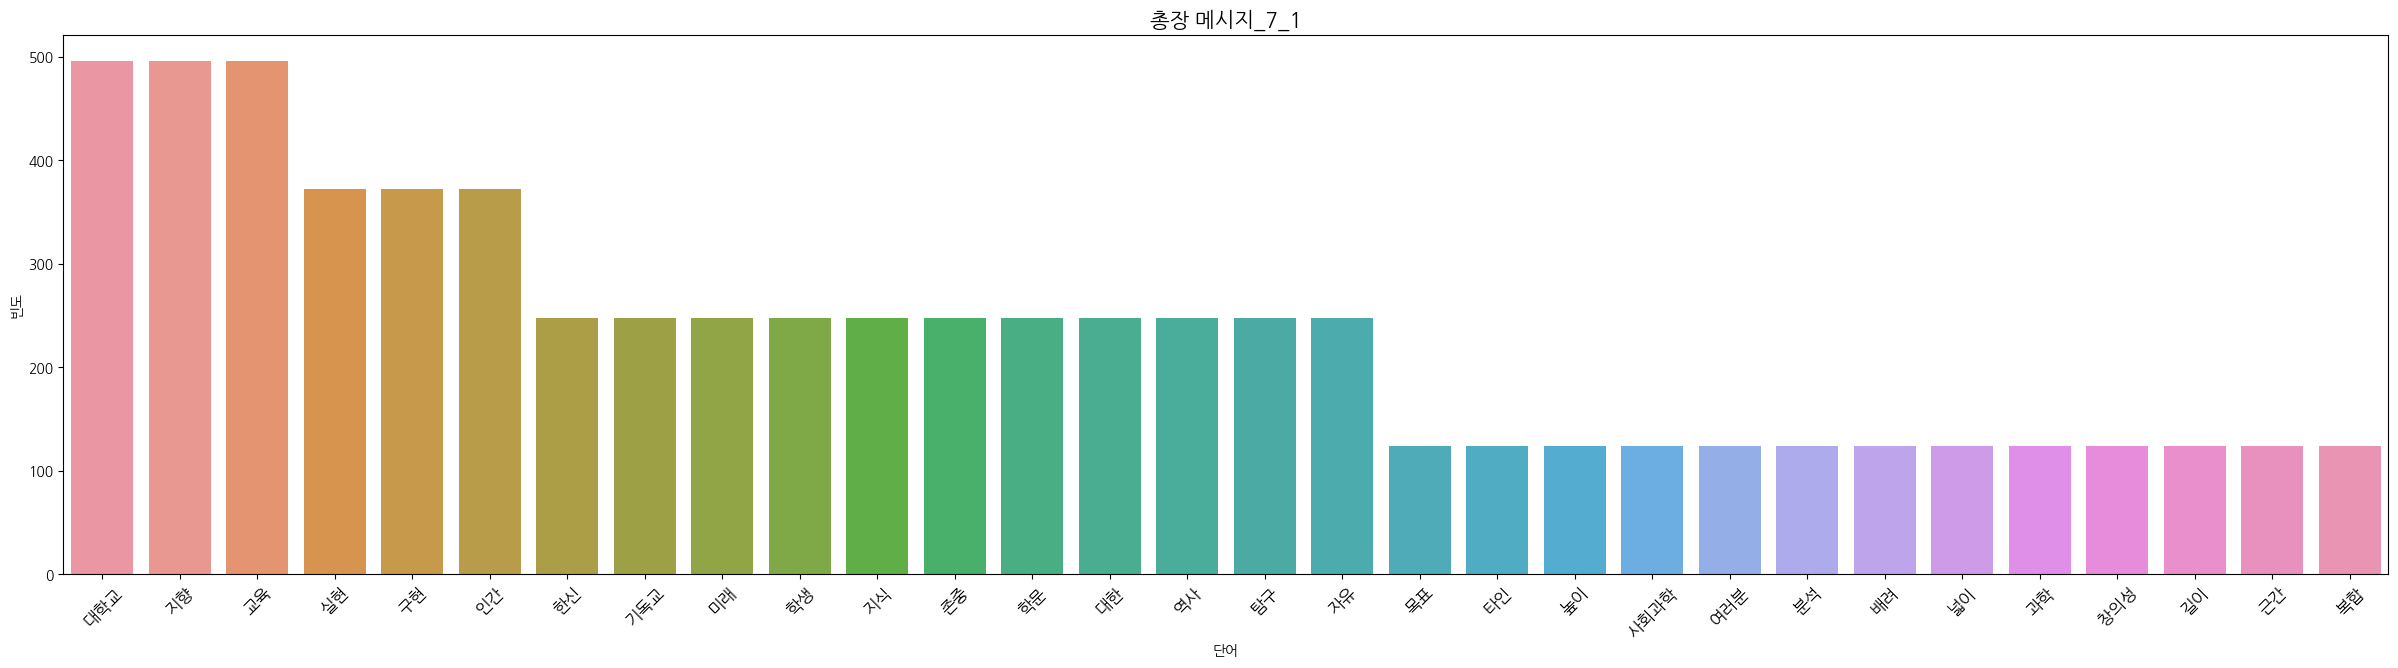

In [64]:
plt.rcParams["figure.figsize"] = (30, 7)
sns.barplot(x='단어', y='빈도', data=df7)

plt.title('총장 메시지_7_1', fontsize = 15)
plt.xticks(rotation=45, fontsize=12)

#plt.show()
plt.savefig('picture7_1.png')

# 7.데이터 저장

In [65]:
df7.to_csv('test7.csv')

# **굿럭!!!**